In [38]:
import numpy as np

dis='orth'
# dis='para'
data = np.genfromtxt( dis+'data.csv',delimiter=',')
x, y = data[:,0], data[:,1]

In [35]:
import matplotlib.pyplot as plt

In [36]:
from scipy import optimize
from math import pi
def fit_func(x, a, b, c, x0):
    return a * np.sin(pi*(x-x0)/b) + c

p0guess = {'orth':[0.12, 1300,0.12,600],'para':[0.12, 1300,0.12,-600]}
params, params_covariance = optimize.curve_fit(fit_func, x, y, p0=p0guess[dis])

para_uncert = []
for i in range(4):
    para_uncert.append(params[i])
    para_uncert.append(params_covariance[i,i])

[0.1236606485962593, 2.862642744214159e-07, 1395.362011476387, 49.231723804511546, 0.12086741016494504, 3.063855731770401e-07, 577.8072159491242, 27.54196678535653]


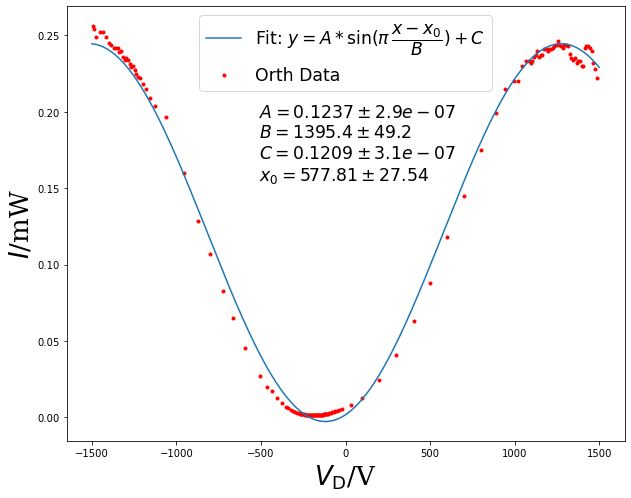

In [39]:
plt.figure(figsize=(10, 8))
x_data = np.linspace(-1500, 1500, num=6000)
plt.plot(x_data, fit_func(x_data, *params),
         label='Fit: $y=A*\sin(\pi\,\dfrac{x-x_0}{B}) + C$' )
plt.scatter(x, y, marker='.', color='#ff0000',label= dis.title()+' Data')

## Orth
plt.legend(loc="upper center",fontsize='xx-large')
plt.text(-510, 0.155, "$A=%.4f\pm%.1e $ \n$B=%.1f\pm%.1f $ \n$C=%.4f\pm%.1e$ \n$x_0=%.2f\pm%.2f $" %tuple(para_uncert), fontsize='xx-large')

## Para
# plt.legend(loc=(0.2,0.05),fontsize='xx-large')
# plt.text(430, 0.213, "$A=%.4f\pm%.1e $ \n$B=%.1f\pm%.1f $ \n$C=%.4f\pm%.1e$ \n$x_0=%.2f\pm%.2f $" %tuple(para_uncert), fontsize='xx-large')

font = {'family': 'serif', 'weight': 'normal', 'size':26}
plt.xlabel("$V_\mathrm{D}$/V",fontdict=font)
plt.ylabel("$I$/mW",fontdict=font)
plt.savefig('pic/'+dis+'.png',dpi=300)
plt.show()